In [ ]:
!pip install spotipy

     |████████████████████████████████| 153kB 12.0MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


# **Authorizing Client Credential**

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [ ]:
client_id = '89fef1b3332b42e58a2bf14366523bc6'
client_secret = '481f2262c51c4e1b95f69925aa29c899'

In [ ]:
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

**Take my "Your Top Songs 2020" Playlist**

In [ ]:
playlist_id = 'spotify:playlist:37i9dQZF1EM0sAXSXDg2Jk'
results = sp.playlist(playlist_id)

In [ ]:
# example data
results['tracks']['items'][0]['track']['album']['name']

'Pieces of Us (feat. King Princess)'

# **Convert into Dataframe**

In [ ]:
ids  = []

# get track's id
for item in results['tracks']['items']:
  track = item['track']['id']
  ids.append(track)

song_meta = {
    'id': [],
    'album': [],
    'name': [],
    'artist': [],
    'explicit': [],
    'popularity': []
}

for song in ids:
  # get single track given track's ID
  track = sp.track(song)

  # song id
  song_meta['id'].append(song)

  # album name
  album = track['album']['name']
  song_meta['album'] += [album]

  # song name
  song =  track['name']
  song_meta['name'] += [song]

  # artist name
  artist = ', '.join([singer['name'] for singer in track['artists']])
  song_meta['artist'] += [artist]

  # explicit
  explicit = track['explicit']
  song_meta['explicit'].append(explicit)

  # popularity
  popularity = track['popularity']
  song_meta['popularity'].append(popularity)

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame.from_dict(song_meta)

In [ ]:
df.head()

,id,album,name,artist,explicit,popularity
0,0ac6wpfha90oah72SCNTPV,Pieces of Us (feat. King Princess),Pieces of Us (feat. King Princess),"Mark Ronson, King Princess",False,39
1,3cl6BsTDeeGRbgug5TXrvg,Shoot Me : Youth Part 1,Shoot Me,DAY6,False,67
2,6PUYqQtGWVAovZrLC9BIqt,Youngblood (Deluxe),Babylon,5 Seconds of Summer,False,61
3,4aceMabp5rzZYoKKXsUffr,MOONRISE,누군가 필요해 I Need Somebody,DAY6,False,62
4,1YlulsUKDduOmC7WxvXYPW,Free Time,Painkiller,Ruel,False,75


In [ ]:
# song features
features = sp.audio_features(song_meta['id'])
features = pd.DataFrame.from_dict(features)

In [ ]:
features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.571,0.747,0,-8.708,0,0.0680,0.15300,0.000000,0.1860,0.350,101.972,audio_features,0ac6wpfha90oah72SCNTPV,spotify:track:0ac6wpfha90oah72SCNTPV,https://api.spotify.com/v1/tracks/0ac6wpfha90o...,https://api.spotify.com/v1/audio-analysis/0ac6...,206401,4
1,0.583,0.916,1,-1.396,1,0.1490,0.06830,0.000000,0.0489,0.732,167.933,audio_features,3cl6BsTDeeGRbgug5TXrvg,spotify:track:3cl6BsTDeeGRbgug5TXrvg,https://api.spotify.com/v1/tracks/3cl6BsTDeeGR...,https://api.spotify.com/v1/audio-analysis/3cl6...,175837,4
2,0.521,0.884,4,-2.931,0,0.0403,0.00155,0.000002,0.2090,0.494,92.988,audio_features,6PUYqQtGWVAovZrLC9BIqt,spotify:track:6PUYqQtGWVAovZrLC9BIqt,https://api.spotify.com/v1/tracks/6PUYqQtGWVAo...,https://api.spotify.com/v1/audio-analysis/6PUY...,213186,4
3,0.419,0.532,5,-4.759,0,0.0344,0.12700,0.000000,0.0785,0.337,184.197,audio_features,4aceMabp5rzZYoKKXsUffr,spotify:track:4aceMabp5rzZYoKKXsUffr,https://api.spotify.com/v1/tracks/4aceMabp5rzZ...,https://api.spotify.com/v1/audio-analysis/4ace...,218737,4
4,0.683,0.420,5,-6.510,1,0.0542,0.08750,0.000000,0.2250,0.469,128.621,audio_features,1YlulsUKDduOmC7WxvXYPW,spotify:track:1YlulsUKDduOmC7WxvXYPW,https://api.spotify.com/v1/tracks/1YlulsUKDduO...,https://api.spotify.com/v1/audio-analysis/1Ylu...,213507,4


In [ ]:
# merge two df
playlist_df = df.merge(features)
playlist_df.head()

,id,album,name,artist,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,0ac6wpfha90oah72SCNTPV,Pieces of Us (feat. King Princess),Pieces of Us (feat. King Princess),"Mark Ronson, King Princess",False,39,0.571,0.747,0,-8.708,0,0.0680,0.15300,0.000000,0.1860,0.350,101.972,audio_features,spotify:track:0ac6wpfha90oah72SCNTPV,https://api.spotify.com/v1/tracks/0ac6wpfha90o...,https://api.spotify.com/v1/audio-analysis/0ac6...,206401,4
1,3cl6BsTDeeGRbgug5TXrvg,Shoot Me : Youth Part 1,Shoot Me,DAY6,False,67,0.583,0.916,1,-1.396,1,0.1490,0.06830,0.000000,0.0489,0.732,167.933,audio_features,spotify:track:3cl6BsTDeeGRbgug5TXrvg,https://api.spotify.com/v1/tracks/3cl6BsTDeeGR...,https://api.spotify.com/v1/audio-analysis/3cl6...,175837,4
2,6PUYqQtGWVAovZrLC9BIqt,Youngblood (Deluxe),Babylon,5 Seconds of Summer,False,61,0.521,0.884,4,-2.931,0,0.0403,0.00155,0.000002,0.2090,0.494,92.988,audio_features,spotify:track:6PUYqQtGWVAovZrLC9BIqt,https://api.spotify.com/v1/tracks/6PUYqQtGWVAo...,https://api.spotify.com/v1/audio-analysis/6PUY...,213186,4
3,4aceMabp5rzZYoKKXsUffr,MOONRISE,누군가 필요해 I Need Somebody,DAY6,False,62,0.419,0.532,5,-4.759,0,0.0344,0.12700,0.000000,0.0785,0.337,184.197,audio_features,spotify:track:4aceMabp5rzZYoKKXsUffr,https://api.spotify.com/v1/tracks/4aceMabp5rzZ...,https://api.spotify.com/v1/audio-analysis/4ace...,218737,4
4,1YlulsUKDduOmC7WxvXYPW,Free Time,Painkiller,Ruel,False,75,0.683,0.420,5,-6.510,1,0.0542,0.08750,0.000000,0.2250,0.469,128.621,audio_features,spotify:track:1YlulsUKDduOmC7WxvXYPW,https://api.spotify.com/v1/tracks/1YlulsUKDduO...,https://api.spotify.com/v1/audio-analysis/1Ylu...,213507,4


In [ ]:
playlist_df.shape

(100, 23)

In [ ]:
playlist_df.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.00000
mean,61.070000,0.623230,0.686760,5.530000,-5.517540,0.460000,0.077901,0.155486,0.022995,0.196531,0.50123,124.222180,206733.500000,3.95000
std,15.749462,0.132309,0.188587,3.611024,2.929293,0.500908,0.067483,0.194878,0.128259,0.152936,0.19839,30.084012,30404.266525,0.35887
min,0.000000,0.288000,0.163000,0.000000,-19.117000,0.000000,0.027600,0.000300,0.000000,0.033500,0.11400,70.956000,128916.000000,1.00000
25%,52.500000,0.559250,0.558000,2.000000,-6.858250,0.000000,0.036675,0.013625,0.000000,0.092400,0.34750,99.997500,189733.250000,4.00000
50%,64.000000,0.639500,0.724000,6.000000,-4.743500,0.000000,0.054300,0.093650,0.000000,0.127000,0.50950,120.018000,203807.000000,4.00000
75%,70.250000,0.705500,0.842000,9.000000,-3.686500,1.000000,0.093125,0.222000,0.000046,0.261500,0.64275,146.229000,221515.500000,4.00000
max,87.000000,0.914000,0.978000,11.000000,-0.995000,1.000000,0.445000,0.902000,0.910000,0.691000,0.92300,199.692000,299013.000000,5.00000


**Data Preprocessing**

In [ ]:
playlist_df['duration_ms'] /= 60000 

In [ ]:
playlist_df = playlist_df.drop(['type', 'uri', 'track_href', 'analysis_url'], axis=1)

In [ ]:
playlist_df.head()

,id,album,name,artist,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0ac6wpfha90oah72SCNTPV,Pieces of Us (feat. King Princess),Pieces of Us (feat. King Princess),"Mark Ronson, King Princess",False,39,0.571,0.747,0,-8.708,0,0.0680,0.15300,0.000000,0.1860,0.350,101.972,3.440017,4
1,3cl6BsTDeeGRbgug5TXrvg,Shoot Me : Youth Part 1,Shoot Me,DAY6,False,67,0.583,0.916,1,-1.396,1,0.1490,0.06830,0.000000,0.0489,0.732,167.933,2.930617,4
2,6PUYqQtGWVAovZrLC9BIqt,Youngblood (Deluxe),Babylon,5 Seconds of Summer,False,61,0.521,0.884,4,-2.931,0,0.0403,0.00155,0.000002,0.2090,0.494,92.988,3.553100,4
3,4aceMabp5rzZYoKKXsUffr,MOONRISE,누군가 필요해 I Need Somebody,DAY6,False,62,0.419,0.532,5,-4.759,0,0.0344,0.12700,0.000000,0.0785,0.337,184.197,3.645617,4
4,1YlulsUKDduOmC7WxvXYPW,Free Time,Painkiller,Ruel,False,75,0.683,0.420,5,-6.510,1,0.0542,0.08750,0.000000,0.2250,0.469,128.621,3.558450,4


# **Data Analysis**

**My Top 5 Artist in 2020**

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Top 5 Artist in 2020')

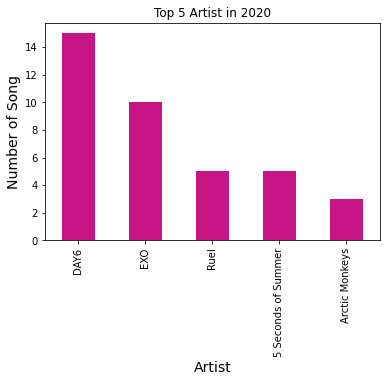

In [ ]:
artist = df.artist.value_counts()[:5]
artist.plot(kind = 'bar', color = 'mediumvioletred')
plt.xlabel('Artist', fontsize = 14)
plt.ylabel('Number of Song', fontsize = 14)
plt.title("Top 5 Artist in 2020")

**Mean Values from Song Features**

In [ ]:
song_features = playlist_df[['danceability', 'energy', 'loudness', 'speechiness', 
                             'acousticness', 'instrumentalness', 'liveness', 'valence',
                             'tempo']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
song_features.loc[:] = min_max_scaler.fit_transform(song_features.loc[:])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


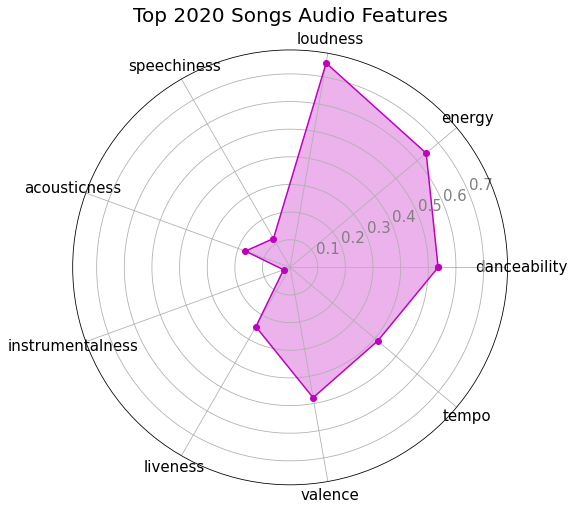

In [ ]:
import math 

# plot size
fig = plt.figure(figsize=(12,8))

# convert column names into a list
categories = song_features.columns.to_list()
# number of categories
N = len(categories)

# create a list with the average of all features
value = song_features.mean().to_list()

# close the circle
# and append the start value to the end.
value.append(value[0])

# calculate angle for each category
angles = [n/float(N)*2*math.pi for n in range(N)]
angles.append(angles[0])

# plot
plt.polar(angles, value,  'o-', color="m")
plt.fill(angles, value, alpha=0.3, facecolor='m')

plt.title('Top 2020 Songs Audio Features', size=20)

plt.xticks(angles[:-1],categories, size=15)
plt.yticks(color='grey',size=15)
plt.show()

looks like i really love loud music. It gaves me energy hahaha